# Time Series Correlation Analysis

This notebook demonstrates how to calculate the correlation between time series data. We'll work with the provided data that shows daily values from August to September 2025.

## 1. Import Required Libraries

First, we'll import the necessary libraries for data manipulation, visualization, and statistical analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Set plot style
plt.rcParams["figure.figsize"] = (12, 6)

## 2. Load and Prepare the Data

Now we'll load the time series data from the provided values. Looking at the data, it appears we have a single time series with dates. For correlation analysis, we need two variables. We'll:

1. Create a DataFrame from the raw data
2. Generate a second time series (either using time or a transformation of the original series)
3. Prepare both series for correlation analysis

In [ ]:
# List of files to load
import lib.load_data as ld

data_frames = ld.load_qmph_frames(name_regex="*._load", limit_days=None)
#data_frames = ld.load_sb_dashboard_data(name_regex=".*_load", limit_days=90)


# Find all files in 'qmph/' folder with '_load' suffix (without extension)
# folder = "qmph"
# to_load = [f[:-4] for f in os.listdir(folder) if f.endswith('_load.txt')]
# #to_load = [f[:-4] for f in os.listdir(folder)]
# #to_load = [f[:-4] for f in os.listdir(folder) if f.startswith('bsbm_')]
# #to_load = ["bsbm100m_load", "bsbm1b_load", "bsbm_rm1m", "xsb_load", "geonames_add150m", "geonames_add2m", "geonames_add5m", "roche_load", "lubm1000_load"]


# Display parsed data
# Display a slice of the first 3 items for each DataFrame
# Only show results for 3 items from data_frames
for name, df in list(data_frames.items())[:3]:
    print(f"Data for {name} (first 3 rows):")
    display(df.head(3))


/Users/simon/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
2025-09-29 00:20:38.678 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


Data for yago2s_load (first 3 rows):


,date,commit,build,qmph
build_date,,,,
7659-2025-07-03-c0a9f9aa7a,2025-07-03,c0a9f9aa7a,7659,121.9
7663-2025-07-04-786ae726af,2025-07-04,786ae726af,7663,140.0
7667-2025-07-05-786ae726af,2025-07-05,786ae726af,7667,147.4


Data for bsbm10m_ud_load (first 3 rows):


,date,commit,build,qmph
build_date,,,,
7659-2025-07-03-c0a9f9aa7a,2025-07-03,c0a9f9aa7a,7659,312.2
7663-2025-07-04-786ae726af,2025-07-04,786ae726af,7663,330.5
7667-2025-07-05-786ae726af,2025-07-05,786ae726af,7667,327.6


Data for bsbm10m_load (first 3 rows):


,date,commit,build,qmph
build_date,,,,
7656-2025-07-02-f54f1eb23a,2025-07-02,f54f1eb23a,7656,306.1
7659-2025-07-03-c0a9f9aa7a,2025-07-03,c0a9f9aa7a,7659,308.9
7660-2025-07-03-12580139cc,2025-07-03,12580139cc,7660,330.5


## 3. Visualize the Time Series

Let's visualize the original time series and the derived series to understand their patterns and potential relationships.

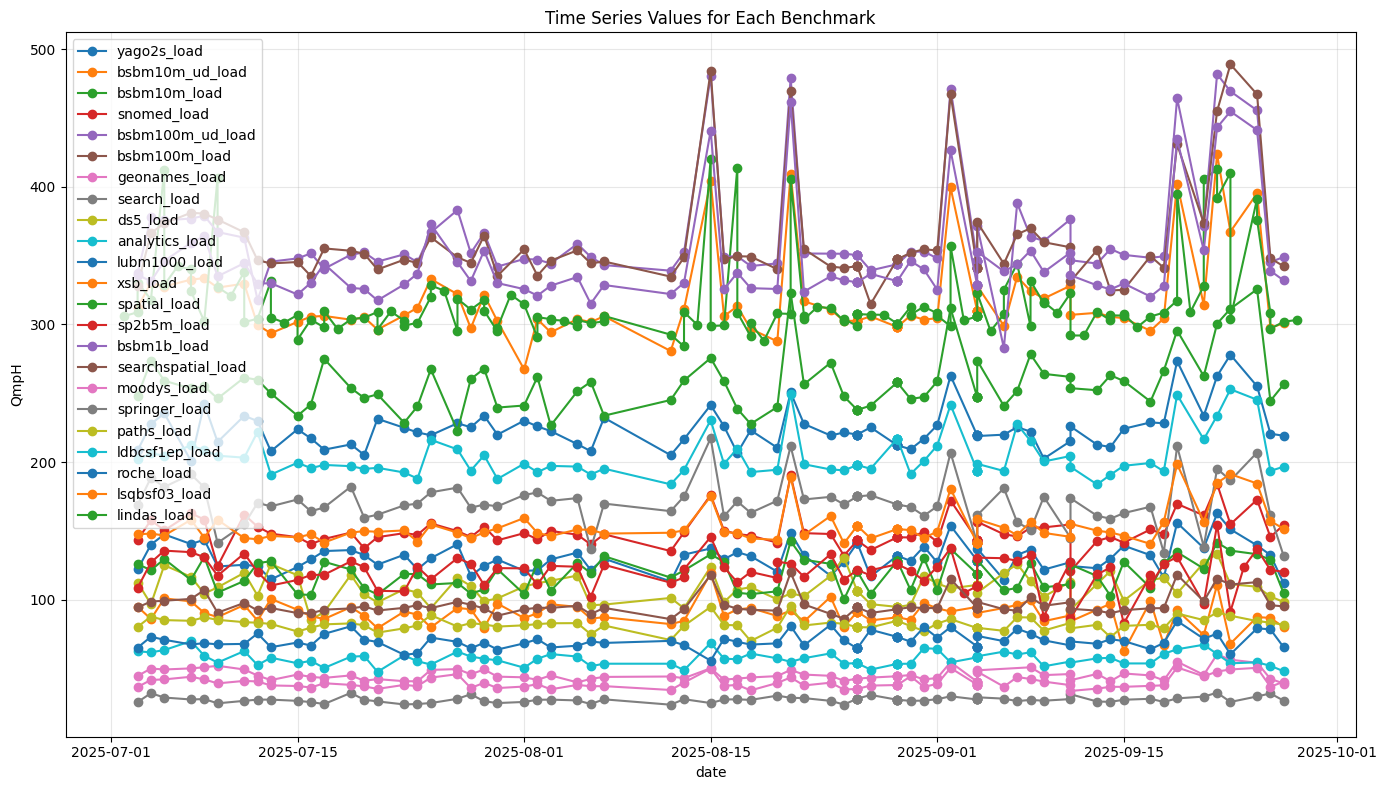

In [4]:
# Plot all series on the same figure
fig, ax = plt.subplots(figsize=(14, 8))
for fname, df in data_frames.items():
    ax.plot(df['date'], df['qmph'], marker='o', linestyle='-', label=fname)

ax.set_xlabel('date')
ax.set_ylabel('QmpH')
ax.set_title('Time Series Values for Each Benchmark')
ax.grid(True, alpha=0.3)
ax.legend(loc='best')
plt.tight_layout()
plt.show()

## 4. Calculate Correlation

Now we can calculate the correlation between all time series in the dataset. We'll use both Pandas' `corr()` method and SciPy's `pearsonr()` function.

In [11]:
# Prepare a dictionary of DataFrames indexed by benchmark name
# map name => series (pd.Series)
series_dict = {name: df['qmph'] for name, df in data_frames.items()}

# Align all series on their date_commit index
all_series = [s for s in series_dict.values()]
common_index = all_series[0].index
for s in all_series[1:]:
    common_index = common_index.intersection(s.index)

# Reindex all series to the common dates
aligned_series = {name: s.loc[common_index] for name, s in series_dict.items()}

# Build a DataFrame for correlation calculation
corr_df = pd.DataFrame(aligned_series)

# Calculate pairwise correlations
corr_matrix = corr_df.corr()
print("Pairwise Pearson Correlation Table:")
display(corr_matrix)

# Other types of analysis:
# - Rolling correlation (see pandas.rolling)
# - Cross-correlation (lag analysis)
# - Granger causality (statsmodels)
# - Cointegration (statsmodels)
# - Clustering time series (scikit-learn)
# - Change point detection (ruptures)
# - Visualization: heatmaps, pairplots
# - Outlier detection
# - Seasonal decomposition (statsmodels)


Pairwise Pearson Correlation Table:


,yago2s_load,bsbm10m_ud_load,bsbm10m_load,snomed_load,bsbm100m_ud_load,bsbm100m_load,geonames_load,search_load,ds5_load,analytics_load,...,sp2b5m_load,bsbm1b_load,searchspatial_load,moodys_load,springer_load,paths_load,ldbcsf1ep_load,roche_load,lsqbsf03_load,lindas_load
yago2s_load,1.000000,0.706019,0.627675,0.611124,0.711014,0.681765,0.655864,0.340599,0.176300,0.304353,...,0.318839,0.680276,0.725456,0.626236,0.561077,0.542510,0.687240,0.291414,0.601364,0.512770
bsbm10m_ud_load,0.706019,1.000000,0.914260,0.798111,0.954095,0.907169,0.777321,0.233113,0.249835,0.286663,...,0.397436,0.938230,0.919943,0.820147,0.631634,0.672283,0.791074,0.247136,0.821053,0.787548
bsbm10m_load,0.627675,0.914260,1.000000,0.778356,0.939626,0.937042,0.760499,0.163065,0.319899,0.277706,...,0.346752,0.946932,0.884453,0.793609,0.606920,0.684836,0.803888,0.164941,0.867902,0.779611
snomed_load,0.611124,0.798111,0.778356,1.000000,0.788601,0.784509,0.631796,0.258407,0.281540,0.315015,...,0.501868,0.787385,0.849431,0.746272,0.575322,0.629544,0.708041,0.244883,0.664745,0.683048
bsbm100m_ud_load,0.711014,0.954095,0.939626,0.788601,1.000000,0.956609,0.777870,0.216292,0.281106,0.254772,...,0.364075,0.961928,0.932362,0.821408,0.665940,0.654958,0.814554,0.194052,0.884185,0.784016
bsbm100m_load,0.681765,0.907169,0.937042,0.784509,0.956609,1.000000,0.778513,0.161528,0.254746,0.228761,...,0.359652,0.950215,0.914188,0.823720,0.647670,0.681534,0.845432,0.162807,0.864193,0.797086
geonames_load,0.655864,0.777321,0.760499,0.631796,0.777870,0.778513,1.000000,0.263738,0.183027,0.252136,...,0.407243,0.765029,0.719386,0.766633,0.597387,0.613090,0.737571,0.266962,0.704400,0.645896
search_load,0.340599,0.233113,0.163065,0.258407,0.216292,0.161528,0.263738,1.000000,0.066460,0.133694,...,0.250287,0.180221,0.325620,0.214852,0.258044,0.253573,0.223226,0.418393,0.177067,0.225625
ds5_load,0.176300,0.249835,0.319899,0.281540,0.281106,0.254746,0.183027,0.066460,1.000000,0.593032,...,0.229098,0.206116,0.240563,0.200177,0.052654,0.133548,0.073303,-0.092376,0.121949,0.073532
analytics_load,0.304353,0.286663,0.277706,0.315015,0.254772,0.228761,0.252136,0.133694,0.593032,1.000000,...,0.303118,0.194079,0.327588,0.297991,0.142527,0.229141,0.144577,-0.050783,0.121865,0.039888


## Change Point Detection

Change point detection for each time series using 'ruptures'

In [12]:
# If not installed, run: !pip install ruptures
import ruptures as rpt

for name, series in aligned_series.items():
    values = series.values
    algo = rpt.Pelt(model="rbf").fit(values)
    # You can adjust the penalty value for sensitivity
    result = algo.predict(pen=10)
    # result contains indices where change points occur (end of segment)
    change_dates = series.index[result[:-1]]  # exclude last index (end of series)
    if change_dates.empty:
        print(f"No change points detected for {name}.")
        continue

    print(f"Change points for {name}:")
    for idx, date in zip(result[:-1], change_dates):
        print(f"  Index: {idx}, Date: {date}")
    # Plot the results
    rpt.display(values, result)
    plt.title(f"Change Point Detection for {name}")
    plt.show()


No change points detected for yago2s_load.
No change points detected for bsbm10m_ud_load.
No change points detected for bsbm10m_load.
No change points detected for snomed_load.
No change points detected for bsbm100m_ud_load.
No change points detected for bsbm100m_load.
No change points detected for geonames_load.
No change points detected for search_load.
No change points detected for ds5_load.
No change points detected for analytics_load.
No change points detected for lubm1000_load.
No change points detected for xsb_load.
No change points detected for spatial_load.
No change points detected for sp2b5m_load.
No change points detected for bsbm1b_load.
No change points detected for searchspatial_load.
No change points detected for moodys_load.
No change points detected for springer_load.
No change points detected for paths_load.
No change points detected for ldbcsf1ep_load.
No change points detected for roche_load.
No change points detected for lsqbsf03_load.
No change points detected fo